In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive
import os

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Đọc dữ liệu từ Drive
file_path = '/content/drive/MyDrive/main/data_binance.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.lower()  # Đảm bảo tên cột ở dạng viết thường


In [5]:
# Tiền xử lý timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp')

In [6]:
# Xem các symbol có trong dữ liệu
symbols = df['symbol'].unique()
print("Các mã tiền điện tử có sẵn:", symbols)

Các mã tiền điện tử có sẵn: ['BNXUSDT' 'LINAUSDT' 'COMBOUSDT' 'BURGERUSDT' 'AXLUSDT' 'SOLUSDT'
 'TURBOUSDT' 'THEUSDT' 'VANRYUSDT' '1000CHEEMSUSDT' 'SANDUSDT' 'APEUSDT'
 'SUPERUSDT' 'RAREUSDT' 'AUDIOUSDT' 'DOGSUSDT' 'STXUSDT' 'ARUSDT'
 'HMSTRUSDT' 'MEMEUSDT' 'PYTHUSDT' 'STRKUSDT' 'WBETHUSDT' 'JTOUSDT'
 'DGBUSDT' 'ATOMUSDT' 'VANAUSDT' 'ORDIUSDT' 'OMUSDT' 'JASMYUSDT'
 'SAGAUSDT' 'FTTUSDT' 'GPSUSDT' 'BNBUSDT' 'IOUSDT' 'LUNCUSDT' 'CFXUSDT'
 'JUVUSDT' 'ENSUSDT' 'TRBUSDT' 'XRPUSDT' 'SSVUSDT' 'ANIMEUSDT'
 'SANTOSUSDT' 'MANAUSDT' 'ACXUSDT' 'C98USDT' 'ALTUSDT' 'GHSTUSDT'
 'RADUSDT' 'COOKIEUSDT' 'USDCUSDT' 'THETAUSDT' 'DFUSDT' 'BLURUSDT'
 'CETUSUSDT' 'BIOUSDT' 'REZUSDT' 'AXSUSDT' 'FIDAUSDT' 'SUSHIUSDT'
 'MANTAUSDT' 'GRTUSDT' 'SKLUSDT' 'COTIUSDT' 'REQUSDT' 'VICUSDT' 'IOTAUSDT'
 'AMPUSDT' 'SHELLUSDT' 'DEXEUSDT' 'WINGUSDT' 'AEVOUSDT' 'SPELLUSDT'
 'ZENUSDT' 'BOMEUSDT' 'SCRUSDT' 'ETHUSDT' '1000CATUSDT' 'CHZUSDT'
 'LPTUSDT' 'VIBUSDT' 'SOLVUSDT' 'CKBUSDT' 'EGLDUSDT' 'USUALUSDT'
 'ALGOUSDT' 'BONKUSDT' 'M

Đã tải mô hình từ /content/drive/MyDrive/models/BNXUSDT.h5
Sẵn sàng dự đoán cho BNXUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/LINAUSDT.h5
Sẵn sàng dự đoán cho LINAUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/COMBOUSDT.h5
Sẵn sàng dự đoán cho COMBOUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/BURGERUSDT.h5
Sẵn sàng dự đoán cho BURGERUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/AXLUSDT.h5
Sẵn sàng dự đoán cho AXLUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SOLUSDT.h5
Sẵn sàng dự đoán cho SOLUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/TURBOUSDT.h5
Sẵn sàng dự đoán cho TURBOUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/THEUSDT.h5
Sẵn sàng dự đoán cho THEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/VANRYUSDT.h5
Sẵn sàng dự đoán cho VANRYUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/1000CHEEMSUSDT.h5
Sẵn sàng dự đoán cho 1000CHEEMSUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SANDUSDT.h5
Sẵn sàng dự đoán cho SANDUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/APEUSDT.h5
Sẵn sàng dự đoán cho APEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SUPERUSDT.h5
Sẵn sàng dự đoán cho SUPERUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/RAREUSDT.h5
Sẵn sàng dự đoán cho RAREUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/AUDIOUSDT.h5
Sẵn sàng dự đoán cho AUDIOUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/DOGSUSDT.h5
Sẵn sàng dự đoán cho DOGSUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/STXUSDT.h5
Sẵn sàng dự đoán cho STXUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ARUSDT.h5
Sẵn sàng dự đoán cho ARUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/HMSTRUSDT.h5
Sẵn sàng dự đoán cho HMSTRUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/MEMEUSDT.h5
Sẵn sàng dự đoán cho MEMEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/PYTHUSDT.h5
Sẵn sàng dự đoán cho PYTHUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/STRKUSDT.h5
Sẵn sàng dự đoán cho STRKUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/WBETHUSDT.h5
Sẵn sàng dự đoán cho WBETHUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/JTOUSDT.h5
Sẵn sàng dự đoán cho JTOUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/DGBUSDT.h5
Sẵn sàng dự đoán cho DGBUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ATOMUSDT.h5
Sẵn sàng dự đoán cho ATOMUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/VANAUSDT.h5
Sẵn sàng dự đoán cho VANAUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ORDIUSDT.h5
Sẵn sàng dự đoán cho ORDIUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/OMUSDT.h5
Sẵn sàng dự đoán cho OMUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/JASMYUSDT.h5
Sẵn sàng dự đoán cho JASMYUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SAGAUSDT.h5
Sẵn sàng dự đoán cho SAGAUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/FTTUSDT.h5
Sẵn sàng dự đoán cho FTTUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/GPSUSDT.h5
Sẵn sàng dự đoán cho GPSUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/BNBUSDT.h5
Sẵn sàng dự đoán cho BNBUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/IOUSDT.h5
Sẵn sàng dự đoán cho IOUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/LUNCUSDT.h5
Sẵn sàng dự đoán cho LUNCUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/CFXUSDT.h5
Sẵn sàng dự đoán cho CFXUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/JUVUSDT.h5
Sẵn sàng dự đoán cho JUVUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ENSUSDT.h5
Sẵn sàng dự đoán cho ENSUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/TRBUSDT.h5
Sẵn sàng dự đoán cho TRBUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/XRPUSDT.h5
Sẵn sàng dự đoán cho XRPUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SSVUSDT.h5
Sẵn sàng dự đoán cho SSVUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ANIMEUSDT.h5
Sẵn sàng dự đoán cho ANIMEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SANTOSUSDT.h5
Sẵn sàng dự đoán cho SANTOSUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/MANAUSDT.h5
Sẵn sàng dự đoán cho MANAUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ACXUSDT.h5
Sẵn sàng dự đoán cho ACXUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/C98USDT.h5
Sẵn sàng dự đoán cho C98USDT


Đã tải mô hình từ /content/drive/MyDrive/models/ALTUSDT.h5
Sẵn sàng dự đoán cho ALTUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/GHSTUSDT.h5
Sẵn sàng dự đoán cho GHSTUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/RADUSDT.h5
Sẵn sàng dự đoán cho RADUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/COOKIEUSDT.h5
Sẵn sàng dự đoán cho COOKIEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/USDCUSDT.h5
Sẵn sàng dự đoán cho USDCUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/THETAUSDT.h5
Sẵn sàng dự đoán cho THETAUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/DFUSDT.h5
Sẵn sàng dự đoán cho DFUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/BLURUSDT.h5
Sẵn sàng dự đoán cho BLURUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/CETUSUSDT.h5
Sẵn sàng dự đoán cho CETUSUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/BIOUSDT.h5
Sẵn sàng dự đoán cho BIOUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/REZUSDT.h5
Sẵn sàng dự đoán cho REZUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/AXSUSDT.h5
Sẵn sàng dự đoán cho AXSUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/FIDAUSDT.h5
Sẵn sàng dự đoán cho FIDAUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SUSHIUSDT.h5
Sẵn sàng dự đoán cho SUSHIUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/MANTAUSDT.h5
Sẵn sàng dự đoán cho MANTAUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/GRTUSDT.h5
Sẵn sàng dự đoán cho GRTUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SKLUSDT.h5
Sẵn sàng dự đoán cho SKLUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/COTIUSDT.h5
Sẵn sàng dự đoán cho COTIUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/REQUSDT.h5
Sẵn sàng dự đoán cho REQUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/VICUSDT.h5
Sẵn sàng dự đoán cho VICUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/IOTAUSDT.h5
Sẵn sàng dự đoán cho IOTAUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/AMPUSDT.h5
Sẵn sàng dự đoán cho AMPUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SHELLUSDT.h5
Sẵn sàng dự đoán cho SHELLUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/DEXEUSDT.h5
Sẵn sàng dự đoán cho DEXEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/WINGUSDT.h5
Sẵn sàng dự đoán cho WINGUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/AEVOUSDT.h5
Sẵn sàng dự đoán cho AEVOUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SPELLUSDT.h5
Sẵn sàng dự đoán cho SPELLUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ZENUSDT.h5
Sẵn sàng dự đoán cho ZENUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/BOMEUSDT.h5
Sẵn sàng dự đoán cho BOMEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SCRUSDT.h5
Sẵn sàng dự đoán cho SCRUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ETHUSDT.h5
Sẵn sàng dự đoán cho ETHUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/1000CATUSDT.h5
Sẵn sàng dự đoán cho 1000CATUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/CHZUSDT.h5
Sẵn sàng dự đoán cho CHZUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/LPTUSDT.h5
Sẵn sàng dự đoán cho LPTUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/VIBUSDT.h5
Sẵn sàng dự đoán cho VIBUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SOLVUSDT.h5
Sẵn sàng dự đoán cho SOLVUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/CKBUSDT.h5
Sẵn sàng dự đoán cho CKBUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/EGLDUSDT.h5
Sẵn sàng dự đoán cho EGLDUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/USUALUSDT.h5
Sẵn sàng dự đoán cho USUALUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ALGOUSDT.h5
Sẵn sàng dự đoán cho ALGOUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/BONKUSDT.h5
Sẵn sàng dự đoán cho BONKUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/MKRUSDT.h5
Sẵn sàng dự đoán cho MKRUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/KAITOUSDT.h5
Sẵn sàng dự đoán cho KAITOUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/RENDERUSDT.h5
Sẵn sàng dự đoán cho RENDERUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/PEPEUSDT.h5
Sẵn sàng dự đoán cho PEPEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/BEAMXUSDT.h5
Sẵn sàng dự đoán cho BEAMXUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/MOVEUSDT.h5
Sẵn sàng dự đoán cho MOVEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/RUNEUSDT.h5
Sẵn sàng dự đoán cho RUNEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/APTUSDT.h5
Sẵn sàng dự đoán cho APTUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SEIUSDT.h5
Sẵn sàng dự đoán cho SEIUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ARBUSDT.h5
Sẵn sàng dự đoán cho ARBUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/1000SATSUSDT.h5
Sẵn sàng dự đoán cho 1000SATSUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/DOTUSDT.h5
Sẵn sàng dự đoán cho DOTUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/TAOUSDT.h5
Sẵn sàng dự đoán cho TAOUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/UNIUSDT.h5
Sẵn sàng dự đoán cho UNIUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/PNUTUSDT.h5
Sẵn sàng dự đoán cho PNUTUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/FUNUSDT.h5
Sẵn sàng dự đoán cho FUNUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SHIBUSDT.h5
Sẵn sàng dự đoán cho SHIBUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/WLDUSDT.h5
Sẵn sàng dự đoán cho WLDUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/NEIROUSDT.h5
Sẵn sàng dự đoán cho NEIROUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ORCAUSDT.h5
Sẵn sàng dự đoán cho ORCAUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/FILUSDT.h5
Sẵn sàng dự đoán cho FILUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/INJUSDT.h5
Sẵn sàng dự đoán cho INJUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/POLUSDT.h5
Sẵn sàng dự đoán cho POLUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/PENGUUSDT.h5
Sẵn sàng dự đoán cho PENGUUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/GALAUSDT.h5
Sẵn sàng dự đoán cho GALAUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/AIXBTUSDT.h5
Sẵn sàng dự đoán cho AIXBTUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/TIAUSDT.h5
Sẵn sàng dự đoán cho TIAUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/VETUSDT.h5
Sẵn sàng dự đoán cho VETUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/OGUSDT.h5
Sẵn sàng dự đoán cho OGUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/DOGEUSDT.h5
Sẵn sàng dự đoán cho DOGEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/EIGENUSDT.h5
Sẵn sàng dự đoán cho EIGENUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ZROUSDT.h5
Sẵn sàng dự đoán cho ZROUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/NEOUSDT.h5
Sẵn sàng dự đoán cho NEOUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/LDOUSDT.h5
Sẵn sàng dự đoán cho LDOUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/XLMUSDT.h5
Sẵn sàng dự đoán cho XLMUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/PENDLEUSDT.h5
Sẵn sàng dự đoán cho PENDLEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/FLOKIUSDT.h5
Sẵn sàng dự đoán cho FLOKIUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/FETUSDT.h5
Sẵn sàng dự đoán cho FETUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/OPUSDT.h5
Sẵn sàng dự đoán cho OPUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/API3USDT.h5
Sẵn sàng dự đoán cho API3USDT


Đã tải mô hình từ /content/drive/MyDrive/models/EOSUSDT.h5
Sẵn sàng dự đoán cho EOSUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ADAUSDT.h5
Sẵn sàng dự đoán cho ADAUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/GMTUSDT.h5
Sẵn sàng dự đoán cho GMTUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/REDUSDT.h5
Sẵn sàng dự đoán cho REDUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/NOTUSDT.h5
Sẵn sàng dự đoán cho NOTUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ETCUSDT.h5
Sẵn sàng dự đoán cho ETCUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ACTUSDT.h5
Sẵn sàng dự đoán cho ACTUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ACHUSDT.h5
Sẵn sàng dự đoán cho ACHUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/DYDXUSDT.h5
Sẵn sàng dự đoán cho DYDXUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ZKUSDT.h5
Sẵn sàng dự đoán cho ZKUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ICPUSDT.h5
Sẵn sàng dự đoán cho ICPUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/RAYUSDT.h5
Sẵn sàng dự đoán cho RAYUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/WUSDT.h5
Sẵn sàng dự đoán cho WUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/PAXGUSDT.h5
Sẵn sàng dự đoán cho PAXGUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/ARKMUSDT.h5
Sẵn sàng dự đoán cho ARKMUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/SUIUSDT.h5
Sẵn sàng dự đoán cho SUIUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/BCHUSDT.h5
Sẵn sàng dự đoán cho BCHUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/JUPUSDT.h5
Sẵn sàng dự đoán cho JUPUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/HIVEUSDT.h5
Sẵn sàng dự đoán cho HIVEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/RSRUSDT.h5
Sẵn sàng dự đoán cho RSRUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/WBTCUSDT.h5
Sẵn sàng dự đoán cho WBTCUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/BANANAUSDT.h5
Sẵn sàng dự đoán cho BANANAUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/XAIUSDT.h5
Sẵn sàng dự đoán cho XAIUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/PEOPLEUSDT.h5
Sẵn sàng dự đoán cho PEOPLEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/EURUSDT.h5
Sẵn sàng dự đoán cho EURUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/HBARUSDT.h5
Sẵn sàng dự đoán cho HBARUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/CAKEUSDT.h5
Sẵn sàng dự đoán cho CAKEUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/TSTUSDT.h5
Sẵn sàng dự đoán cho TSTUSDT


Đã tải mô hình từ /content/drive/MyDrive/models/VIDTUSDT.h5
Sẵn sàng dự đoán cho VIDTUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã tải mô hình từ /content/drive/MyDrive/models/WIFUSDT.h5
Sẵn sàng dự đoán cho WIFUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/NEARUSDT.h5


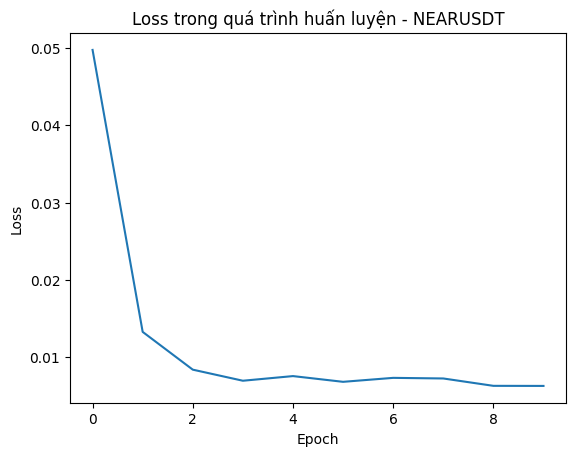

Sẵn sàng dự đoán cho NEARUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/AAVEUSDT.h5


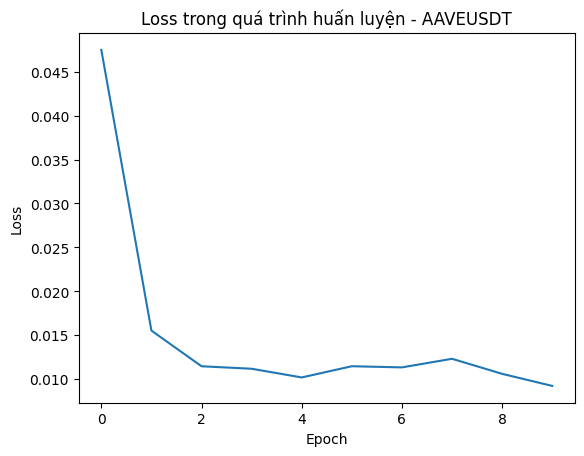

Sẵn sàng dự đoán cho AAVEUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/LAYERUSDT.h5


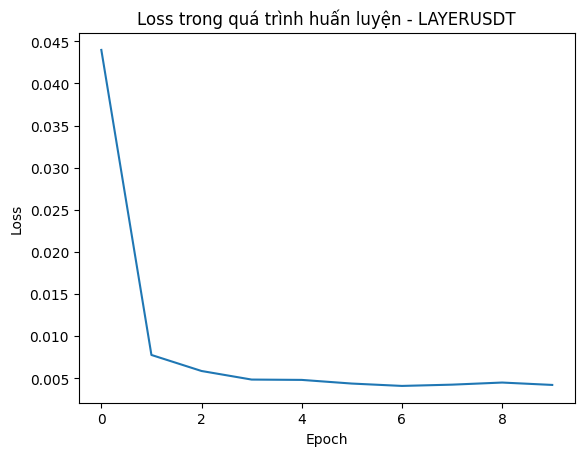

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho LAYERUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/CRVUSDT.h5


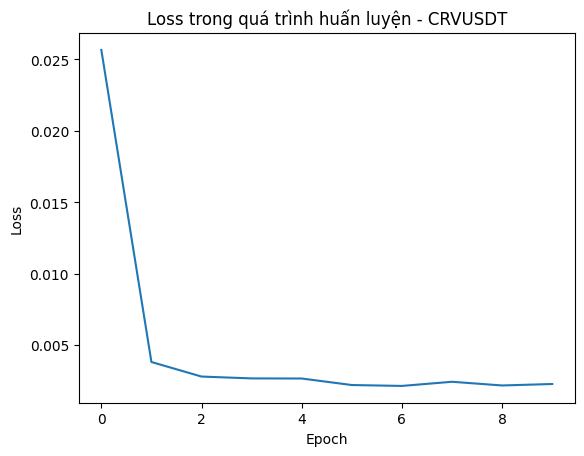

Sẵn sàng dự đoán cho CRVUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/AUCTIONUSDT.h5


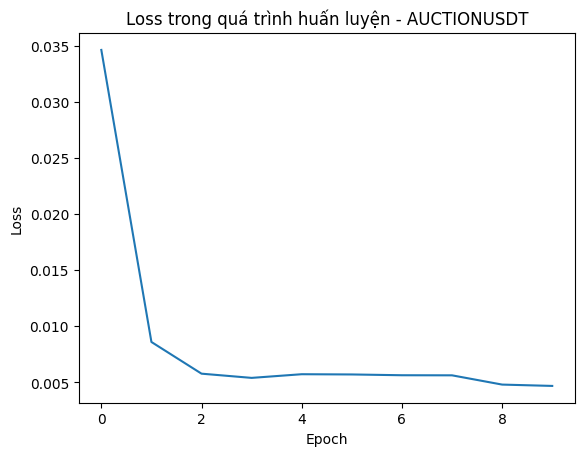

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho AUCTIONUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/ENAUSDT.h5


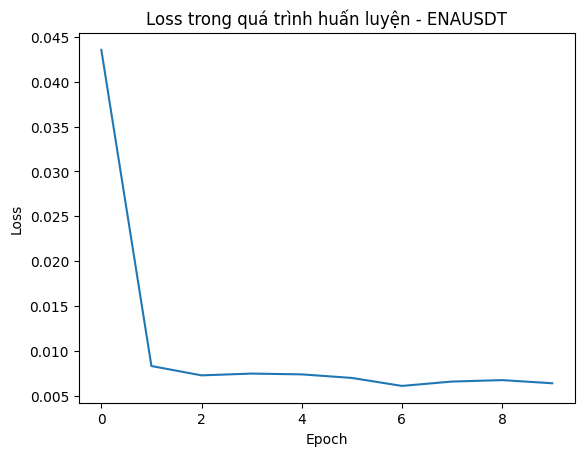

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho ENAUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/AVAXUSDT.h5


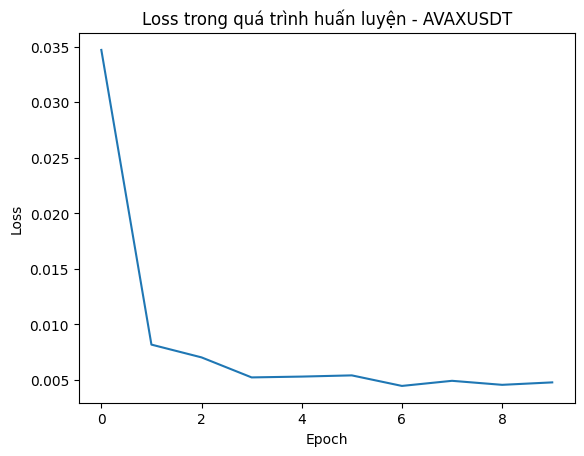

Sẵn sàng dự đoán cho AVAXUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/LINKUSDT.h5


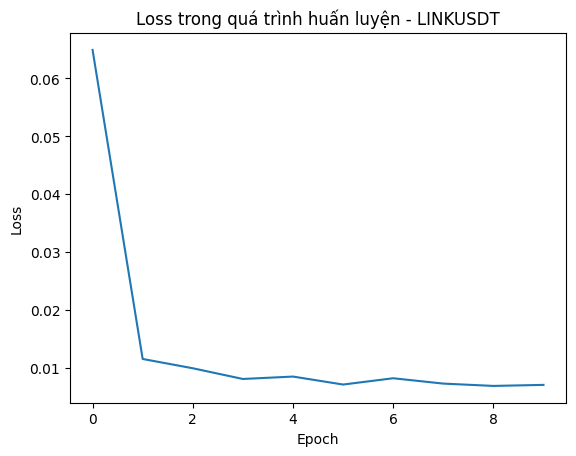

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho LINKUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/TONUSDT.h5


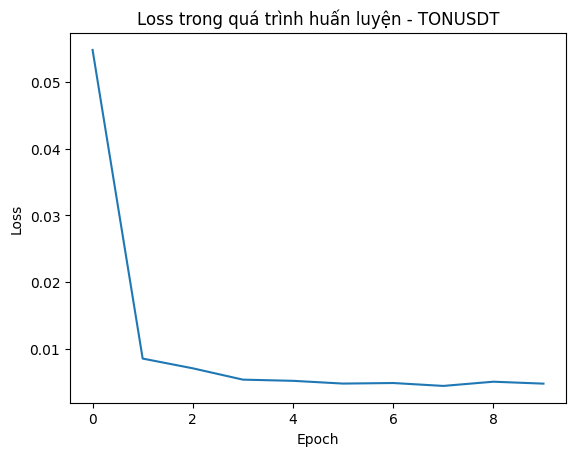

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho TONUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/LTCUSDT.h5


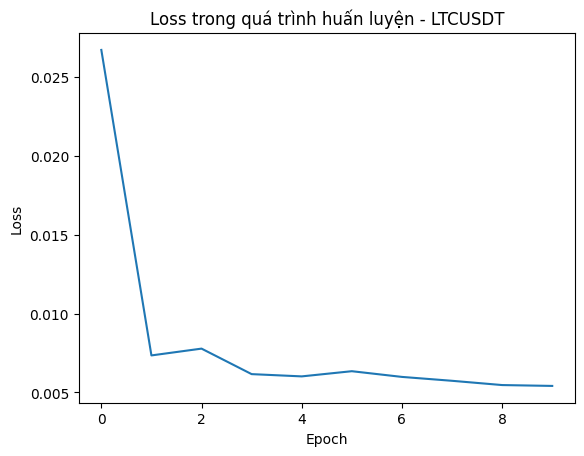

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho LTCUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/TRXUSDT.h5


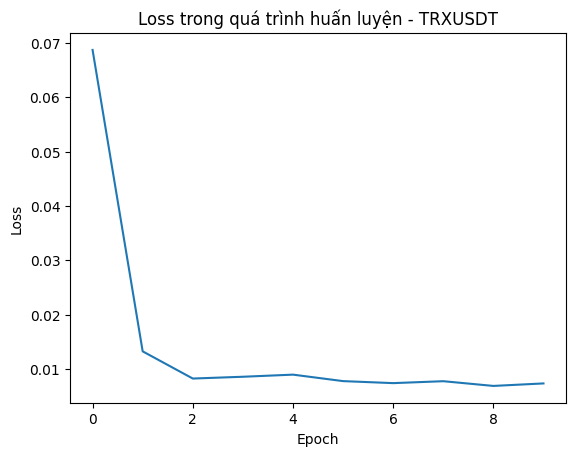

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho TRXUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/SUSDT.h5


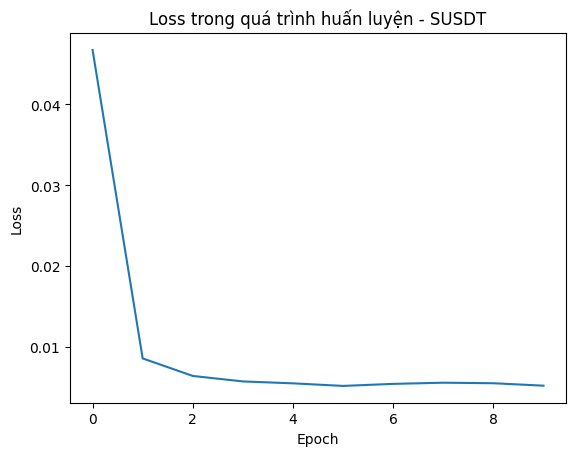

Sẵn sàng dự đoán cho SUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/BERAUSDT.h5


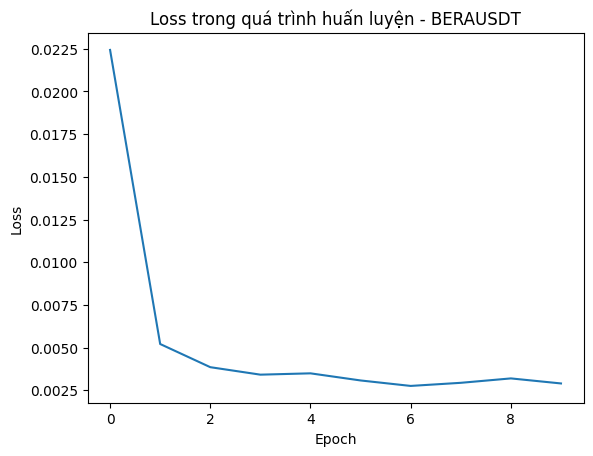

Sẵn sàng dự đoán cho BERAUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/ETHFIUSDT.h5


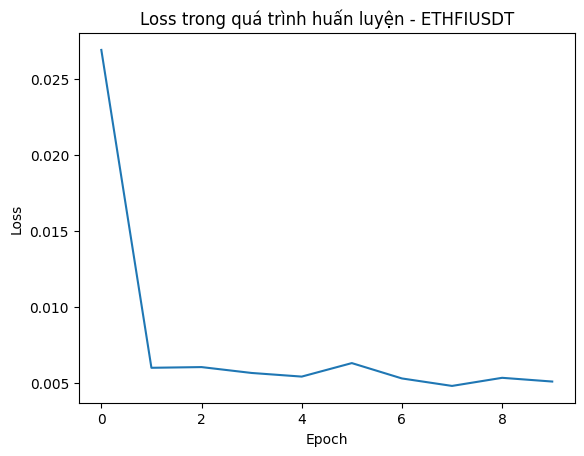

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho ETHFIUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/BBUSDT.h5


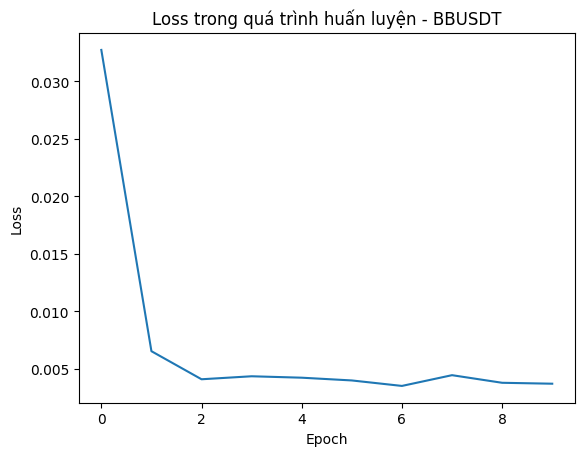

Sẵn sàng dự đoán cho BBUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/BTCUSDT.h5


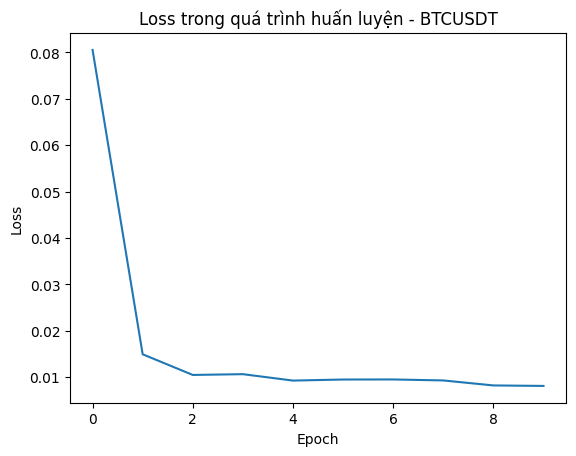

Sẵn sàng dự đoán cho BTCUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/TRUMPUSDT.h5


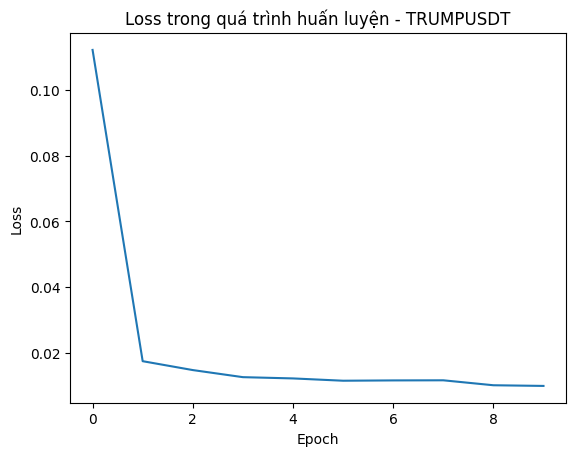

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho TRUMPUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/HFTUSDT.h5


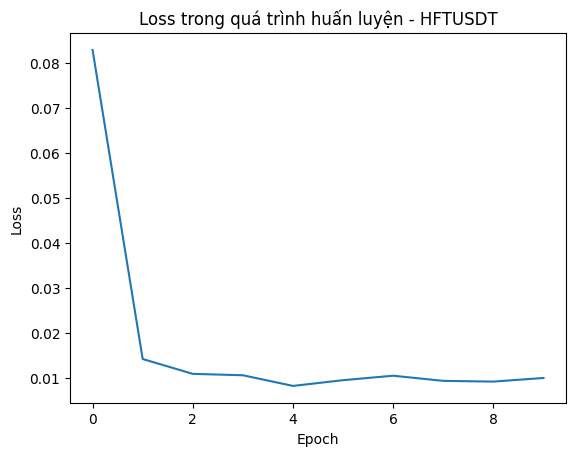

Sẵn sàng dự đoán cho HFTUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/ZECUSDT.h5


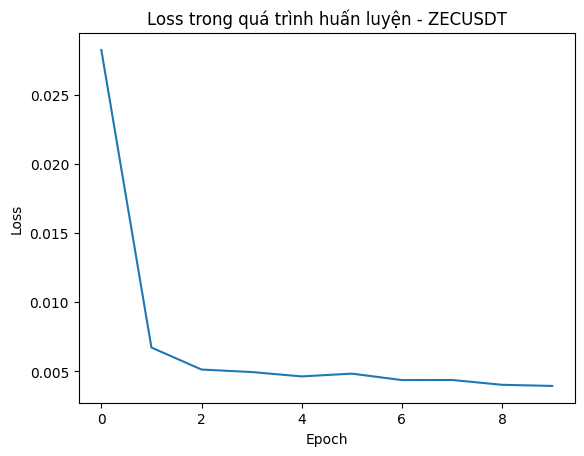

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho ZECUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/IMXUSDT.h5


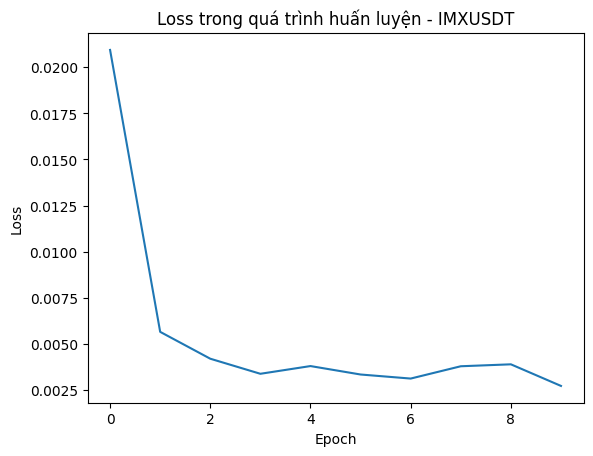

Sẵn sàng dự đoán cho IMXUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/ROSEUSDT.h5


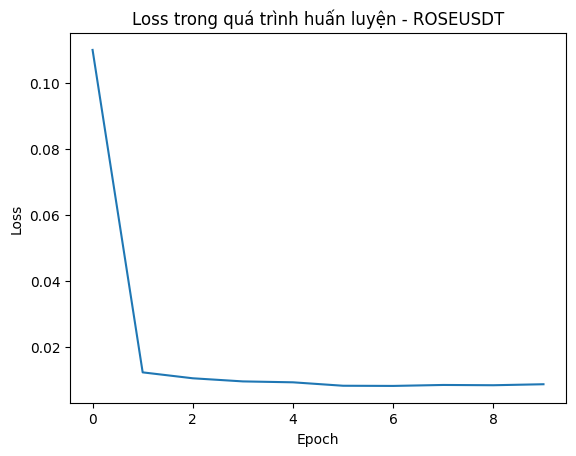

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho ROSEUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/1MBABYDOGEUSDT.h5


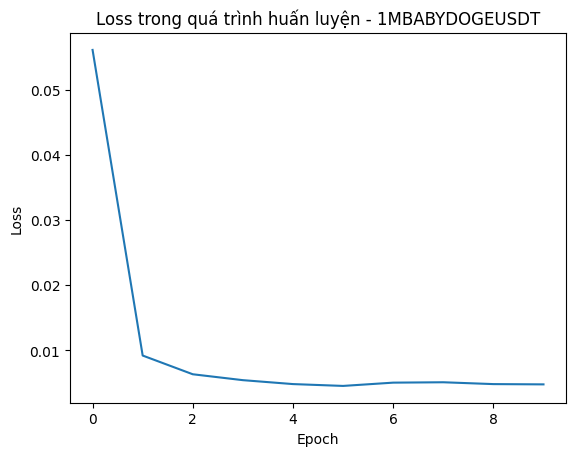

Sẵn sàng dự đoán cho 1MBABYDOGEUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/STPTUSDT.h5


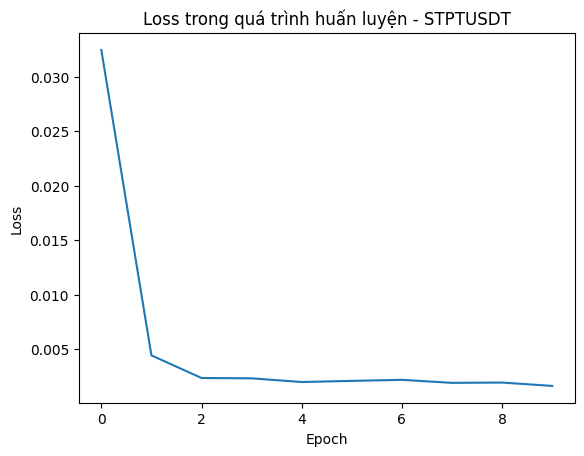

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho STPTUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/XVSUSDT.h5


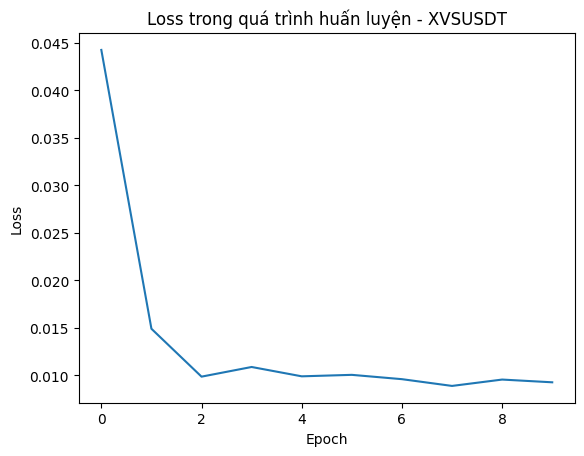

Sẵn sàng dự đoán cho XVSUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/CELOUSDT.h5


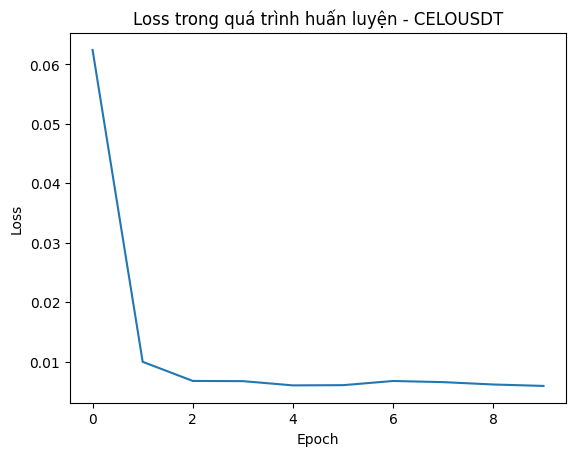

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho CELOUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/VELODROMEUSDT.h5


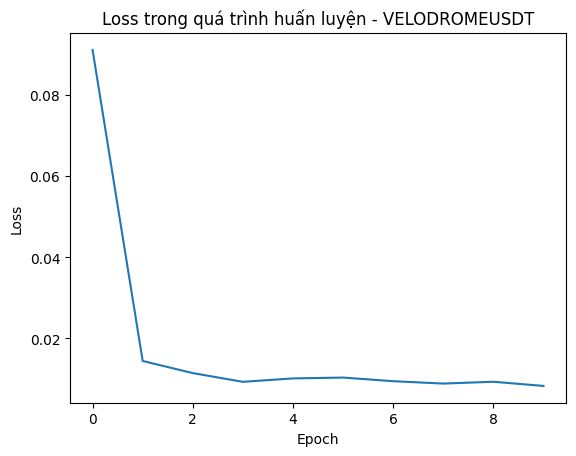

Sẵn sàng dự đoán cho VELODROMEUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/LUNAUSDT.h5


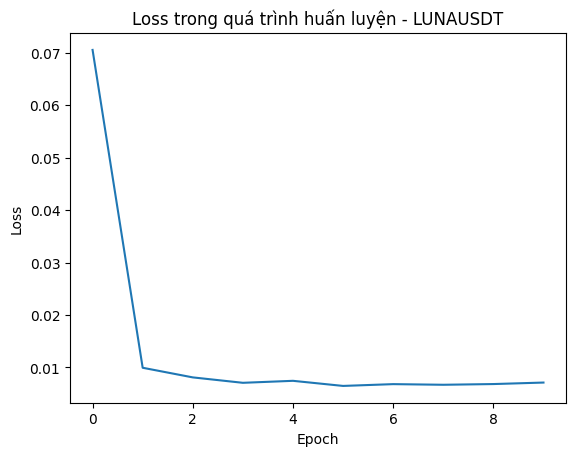

Sẵn sàng dự đoán cho LUNAUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/PIXELUSDT.h5


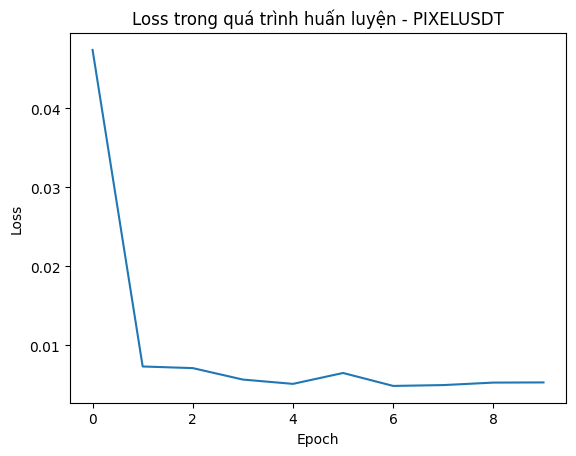

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho PIXELUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/ELFUSDT.h5


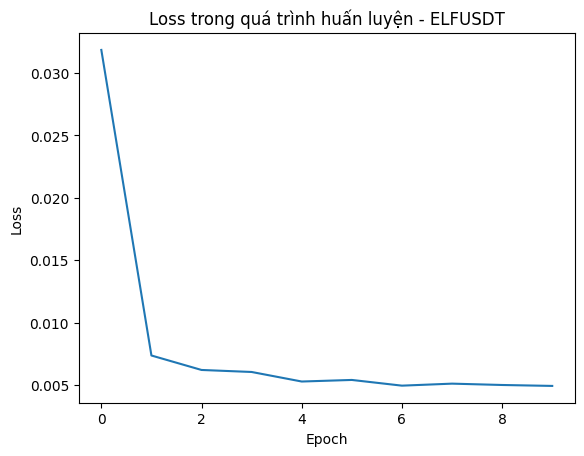

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho ELFUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/XTZUSDT.h5


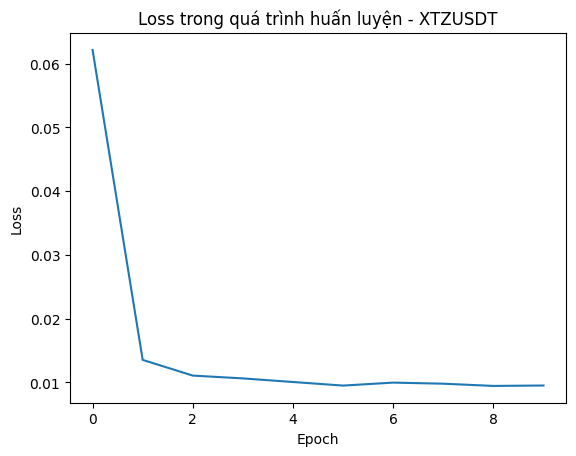

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho XTZUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/FDUSDUSDT.h5


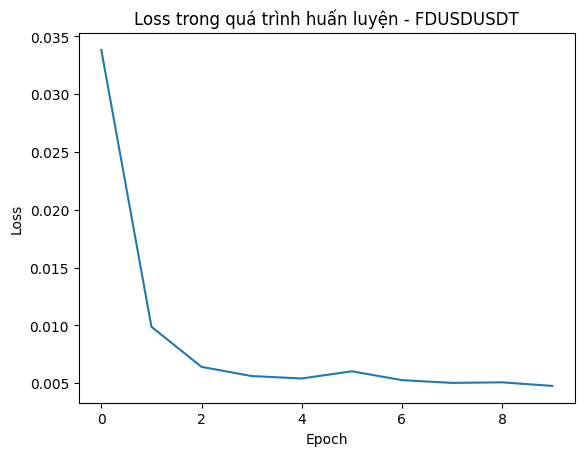

Sẵn sàng dự đoán cho FDUSDUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/CVXUSDT.h5


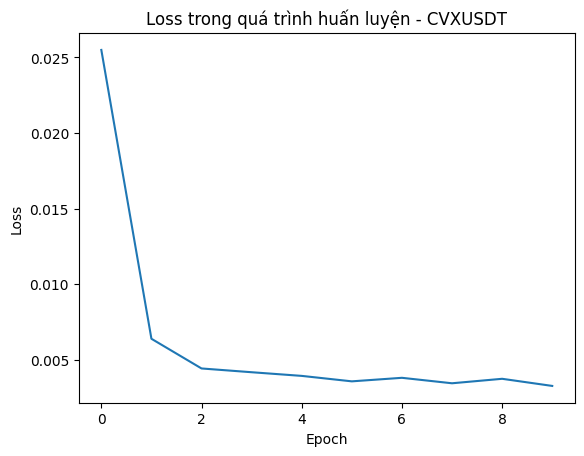

Sẵn sàng dự đoán cho CVXUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/KAVAUSDT.h5


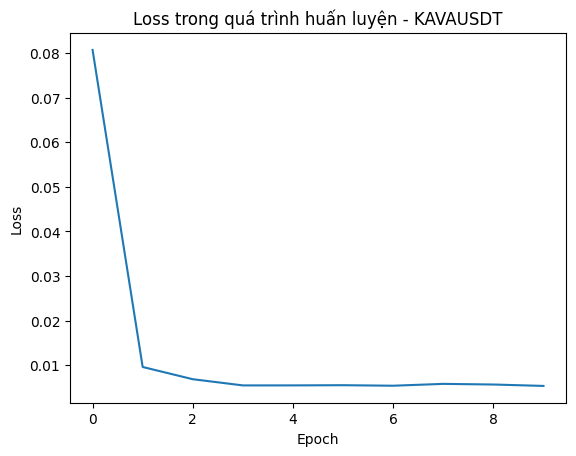

Sẵn sàng dự đoán cho KAVAUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/KDAUSDT.h5


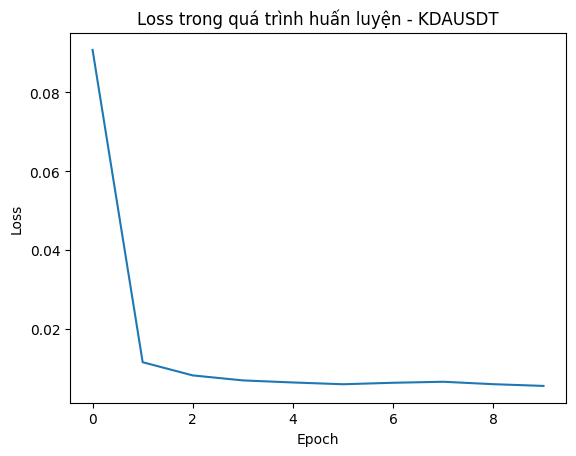

Sẵn sàng dự đoán cho KDAUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/BMTUSDT.h5


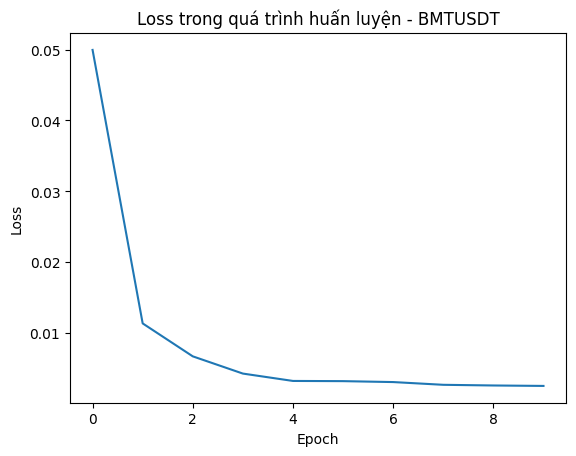

Sẵn sàng dự đoán cho BMTUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/FORMUSDT.h5


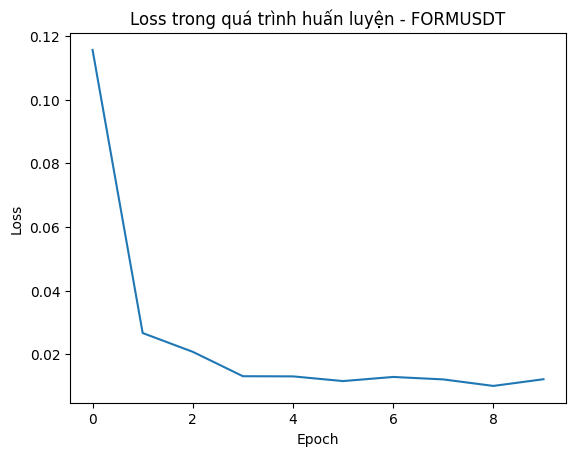

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho FORMUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/NILUSDT.h5


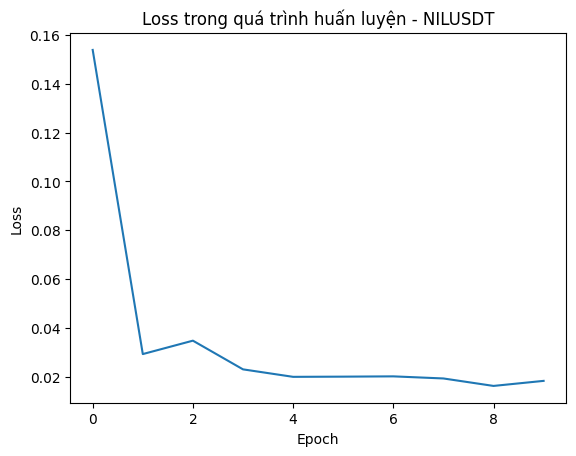

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho NILUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/PARTIUSDT.h5


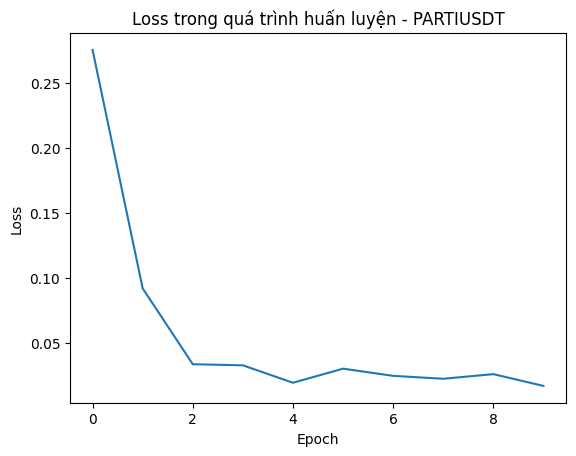

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho PARTIUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/MUBARAKUSDT.h5


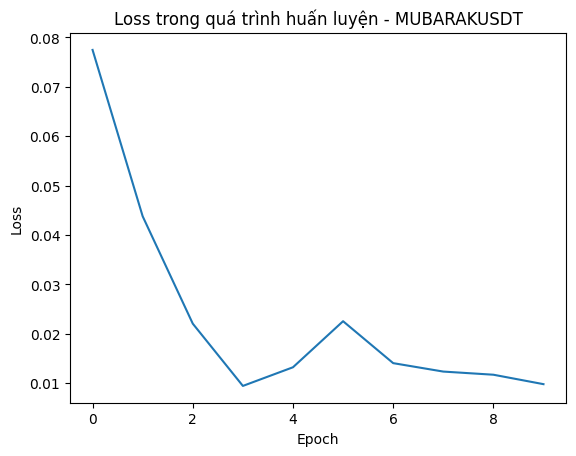

Sẵn sàng dự đoán cho MUBARAKUSDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/TUTUSDT.h5


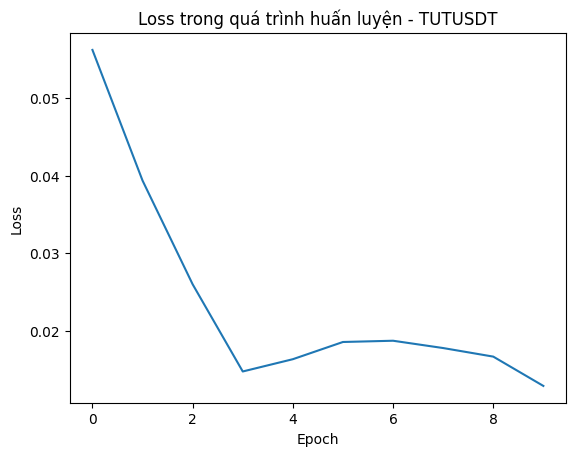

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sẵn sàng dự đoán cho TUTUSDT


Đã lưu mô hình tại /content/drive/MyDrive/models/BANANAS31USDT.h5


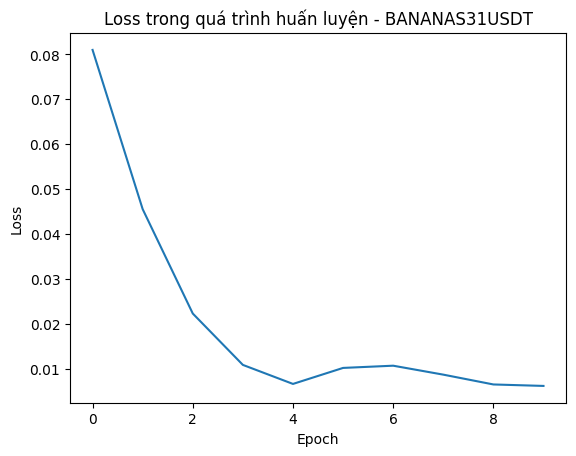

Sẵn sàng dự đoán cho BANANAS31USDT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Đã lưu mô hình tại /content/drive/MyDrive/models/BROCCOLI714USDT.h5


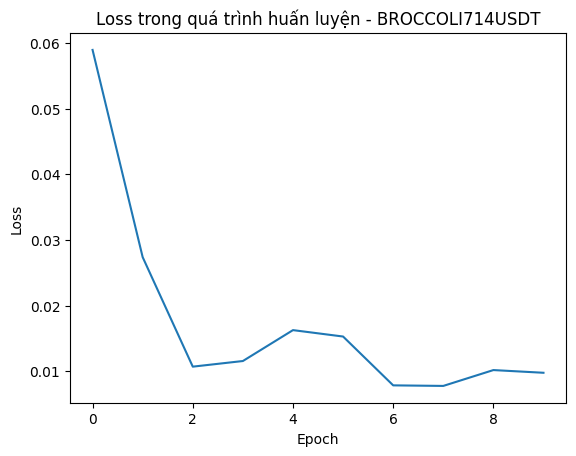

Sẵn sàng dự đoán cho BROCCOLI714USDT


In [7]:
# Tiền xử lý và chuẩn bị dữ liệu cho toàn bộ tập dữ liệu
all_data = {}
scalers = {}
models = {}
time_steps = 10
model_dir = '/content/drive/MyDrive/models'
os.makedirs(model_dir, exist_ok=True)

for symbol in symbols:
    temp_df = df[df['symbol'] == symbol][['timestamp', 'close']].copy()
    temp_df.set_index('timestamp', inplace=True)

    if temp_df.empty:
        print(f"Bỏ qua {symbol} do không có dữ liệu.")
        continue

    scaler = MinMaxScaler(feature_range=(0, 1))
    temp_df['close'] = scaler.fit_transform(temp_df[['close']])

    data = temp_df['close'].values
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    X, y = np.array(X), np.array(y)
    if len(X) == 0:
        print(f"Bỏ qua {symbol} vì không đủ dữ liệu.")
        continue

    X = X.reshape((X.shape[0], X.shape[1], 1))

    all_data[symbol] = (X, y)
    scalers[symbol] = scaler

    model_path = f'{model_dir}/{symbol}.h5'
    if os.path.exists(model_path):
        model = load_model(model_path)
        print(f"Đã tải mô hình từ {model_path}")
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
            Dropout(0.2),
            LSTM(50),
            Dropout(0.2),
            Dense(1)
        ])

        model.compile(optimizer='adam', loss='mean_squared_error')
        history = model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

        model.save(model_path)
        print(f"Đã lưu mô hình tại {model_path}")

        # Vẽ biểu đồ loss
        plt.plot(history.history['loss'])
        plt.title(f"Loss trong quá trình huấn luyện - {symbol}")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.show()

    models[symbol] = model
    print(f"Sẵn sàng dự đoán cho {symbol}")

In [8]:
# Nhập loại tiền điện tử để test
symbol = input("Nhập mã tiền điện tử để dự đoán (VD: BTCUSDT): ").strip().upper()

print("Các mô hình đã được huấn luyện:", list(models.keys()))

if symbol not in all_data or symbol not in models:
    raise ValueError(f"Không tìm thấy mô hình hoặc dữ liệu cho symbol: {symbol}")

Nhập mã tiền điện tử để dự đoán (VD: BTCUSDT): ETHUSDT
Các mô hình đã được huấn luyện: ['BNXUSDT', 'LINAUSDT', 'COMBOUSDT', 'BURGERUSDT', 'AXLUSDT', 'SOLUSDT', 'TURBOUSDT', 'THEUSDT', 'VANRYUSDT', '1000CHEEMSUSDT', 'SANDUSDT', 'APEUSDT', 'SUPERUSDT', 'RAREUSDT', 'AUDIOUSDT', 'DOGSUSDT', 'STXUSDT', 'ARUSDT', 'HMSTRUSDT', 'MEMEUSDT', 'PYTHUSDT', 'STRKUSDT', 'WBETHUSDT', 'JTOUSDT', 'DGBUSDT', 'ATOMUSDT', 'VANAUSDT', 'ORDIUSDT', 'OMUSDT', 'JASMYUSDT', 'SAGAUSDT', 'FTTUSDT', 'GPSUSDT', 'BNBUSDT', 'IOUSDT', 'LUNCUSDT', 'CFXUSDT', 'JUVUSDT', 'ENSUSDT', 'TRBUSDT', 'XRPUSDT', 'SSVUSDT', 'ANIMEUSDT', 'SANTOSUSDT', 'MANAUSDT', 'ACXUSDT', 'C98USDT', 'ALTUSDT', 'GHSTUSDT', 'RADUSDT', 'COOKIEUSDT', 'USDCUSDT', 'THETAUSDT', 'DFUSDT', 'BLURUSDT', 'CETUSUSDT', 'BIOUSDT', 'REZUSDT', 'AXSUSDT', 'FIDAUSDT', 'SUSHIUSDT', 'MANTAUSDT', 'GRTUSDT', 'SKLUSDT', 'COTIUSDT', 'REQUSDT', 'VICUSDT', 'IOTAUSDT', 'AMPUSDT', 'SHELLUSDT', 'DEXEUSDT', 'WINGUSDT', 'AEVOUSDT', 'SPELLUSDT', 'ZENUSDT', 'BOMEUSDT', 'SCRUSDT', 

In [9]:
X, y = all_data[symbol]
scaler = scalers[symbol]
model = models[symbol]

In [10]:
# Dự đoán giá
y_pred = model.predict(X)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_actual = scaler.inverse_transform(y.reshape(-1, 1))

# In kết quả dự đoán và giá thực tế
df_result = pd.DataFrame({
    'Giá thực tế': y_actual.flatten(),
    'Giá dự đoán': y_pred.flatten()
})
print("\nKết quả dự đoán (hiển thị 20 dòng cuối):")
print(df_result.tail(20))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

Kết quả dự đoán (hiển thị 20 dòng cuối):
     Giá thực tế  Giá dự đoán
470      1869.94  1893.682495
471      1884.02  1889.546265
472      1879.40  1886.630737
473      1874.16  1884.419556
474      1877.29  1882.447876
475      1886.05  1881.034058
476      1901.42  1880.810303
477      1896.90  1882.488770
478      1903.43  1884.711426
479      1910.01  1887.558228
480      1895.27  1891.171875
481      1899.83  1893.719360
482      1894.73  1895.489990
483      1888.41  1896.454834
484      1882.30  1896.350464
485      1880.14  1895.039307
486      1884.57  1892.885986
487      1877.04  1890.682983
488      1868.79  1888.365112
489      1870.10  1885.495972


In [11]:
# Đánh giá mô hình
mse = mean_squared_error(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print("\nĐánh giá mô hình:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Đánh giá mô hình:
Mean Squared Error (MSE): 911.0601
Mean Absolute Error (MAE): 22.9700
R-squared (R²): 0.8370


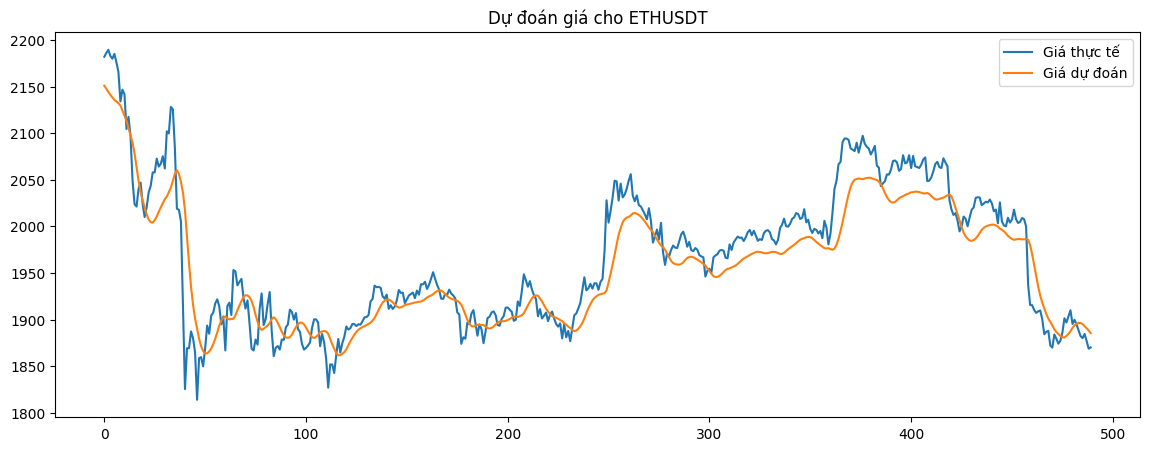

In [12]:
# Hiển thị kết quả
plt.figure(figsize=(14, 5))
plt.plot(y_actual, label='Giá thực tế')
plt.plot(y_pred, label='Giá dự đoán')
plt.title(f"Dự đoán giá cho {symbol}")
plt.legend()
plt.show()